## Import Need Libraries

In [12]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #for scaling
from sklearn.preprocessing import LabelEncoder # doe encoding 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

## Reading the Data Frame

In [13]:
dataset = pd.read_csv("E:\data anaylsis\MachineLearning-Tasks\DataPreProcessing\Human_Resources_Employee_Attrition.csv")
dataset

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# ------------------------------------------------------------------------------------------------------------

# Data Description 

## Author: Pavly Safwat

In [14]:
print(dataset.shape)
# 14999 instances and 10 attributes
print(dataset.columns)



(14999, 10)
Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


# columns
<dt>satisfaction_level</dt><dd>- numeric rating between 0 and 1 (like a percentage) to represent how satisfied are they</dd> 
<dt>last_evaluation</dt>        <dd>- numeric rating between 0 and 1 to represent the last evaluation</dd>
<dt>number_of_projects</dt>     <dd>- number of projects participated in</dd>
<dt>average_monthly_hours</dt>  <dd>- number of hours worked in the month</dd>
<dt>years_at_company</dt>       <dd>- number of years worked at the company</dd>
<dt>work_accident</dt>          <dd>- number either (0 = no accidents) or (1 = an accident)</dd>
<dt>left</dt>                   <dd>- number either (0 = still working) or (1 = left work)</dd>
<dt>promotion_last_5years</dt>  <dd>- number either (0 = no promotion in last 5 years) or (1 = had a promotion in last 5 years)</dd>
<dt>department</dt>             <dd>- String the department where they work, can be encoded into one hot</dd>
<dt>salary</dt>                 <dd>- String the salary expressed in ranges(low,mid,high), can also be encoded the same way</dd>
</dl>

In [15]:
#check what is null
dataset.isnull().sum()
#no null data, so no need to drop anything

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [16]:
print(dataset['department'].describe())
# 10 differnet departments 
print(dataset['salary'].describe())
# 3 differnet ranges (low,meduim,high)

count     14999
unique       10
top       sales
freq       4140
Name: department, dtype: object
count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object


In [17]:
# shuffeling the dataset
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset
# ps no need for the old index so i reset the index

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.76,0.77,5,257,3,0,0,0,RandD,medium
1,0.60,0.80,4,253,2,0,0,0,technical,low
2,0.98,0.53,3,234,3,0,0,0,sales,medium
3,0.93,0.60,4,184,3,0,0,0,sales,medium
4,0.71,0.77,4,192,4,0,0,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
14994,0.10,0.86,6,309,4,0,1,0,sales,medium
14995,0.40,0.48,2,138,3,0,1,0,marketing,medium
14996,1.00,0.49,3,106,4,0,0,0,support,low
14997,0.74,0.94,4,157,2,0,0,0,sales,medium


# Main comments
<ul>
  <li>Encoding of Department and salary</li>
  <li>Determine and remove outliers </li>
</ul>



# Missing Data Handling

## Author : Salma 

## Firstly, let's check for any missing data

In [18]:
#missing data check
dataset.isnull()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


## Making the results more readable

In [19]:
#readable checking for missing data
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

# As we see, the data is already cleaned and there is no missing data

# ------------------------------------------------------------------------------------------------------------

# Handling The Outliers 

## Author:Ahmed Samir

In [20]:
dataset['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

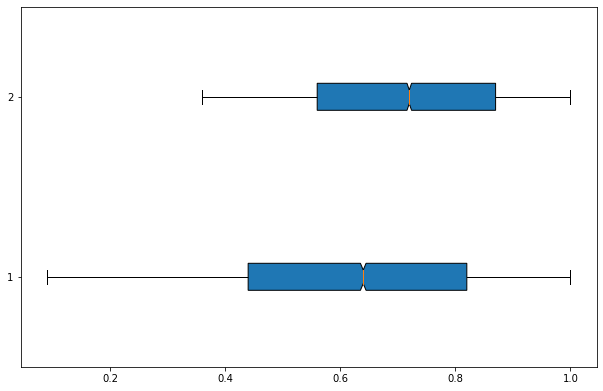

In [29]:
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([dataset.satisfaction_level,dataset.last_evaluation],patch_artist = True,
                notch ='True', vert = 0)

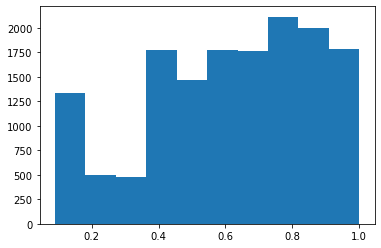

In [30]:
plt.hist(dataset['satisfaction_level'])
plt.show()

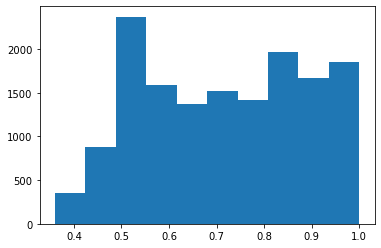

In [31]:
plt.hist(dataset['last_evaluation'])
plt.show()

In [32]:
dataset['average_monthly_hours'].describe()

count    14999.000000
mean         0.490889
std          0.233379
min          0.000000
25%          0.280374
50%          0.485981
75%          0.696262
max          1.000000
Name: average_monthly_hours, dtype: float64

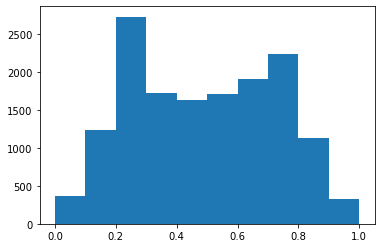

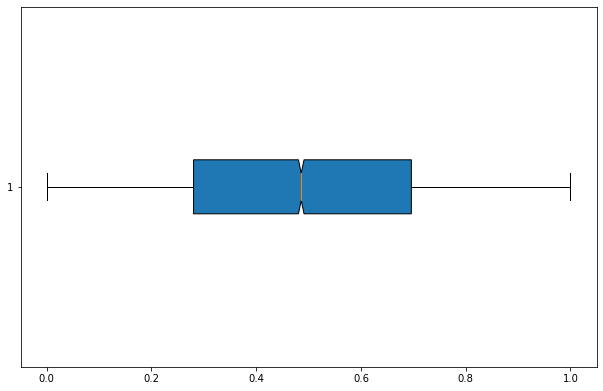

In [33]:
plt.hist(dataset['average_monthly_hours'])
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([dataset.average_monthly_hours],patch_artist = True,notch ='True', vert = 0)
plt.show()

In [34]:
dataset['number_of_projects'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_of_projects, dtype: float64

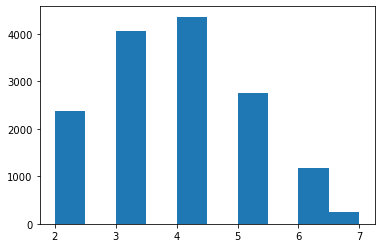

In [35]:
plt.hist(dataset['number_of_projects'])
plt.show()

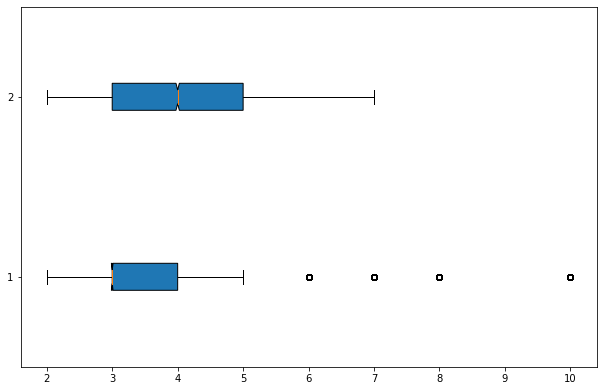

In [37]:
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([dataset.years_at_company,dataset.number_of_projects],patch_artist = True,notch ='True', vert = 0)
plt.show()

# ------------------------------------------------------------------------------------------------------------

# Encoding 

## Author: Ahmed Taha

## Lets View Part of data to check if it need to encodeing

In [21]:
dataset.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.76,0.77,5,257,3,0,0,0,RandD,medium
1,0.60,0.80,4,253,2,0,0,0,technical,low
2,0.98,0.53,3,234,3,0,0,0,sales,medium
3,0.93,0.60,4,184,3,0,0,0,sales,medium
4,0.71,0.77,4,192,4,0,0,0,sales,medium


## Yes we can encode the department and salary coloums

In [22]:
dataset["department"].astype('category')

0            RandD
1        technical
2            sales
3            sales
4            sales
           ...    
14994        sales
14995    marketing
14996      support
14997        sales
14998    technical
Name: department, Length: 14999, dtype: category
Categories (10, object): ['IT', 'RandD', 'accounting', 'hr', ..., 'product_mng', 'sales', 'support', 'technical']

## There's 10 Categories of the department coloum so by using dummies will encode them

In [23]:
dum_df = pd.get_dummies(dataset, columns=["department"], prefix=["department_Type_is"] )
dum_df

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,salary,department_Type_is_IT,department_Type_is_RandD,department_Type_is_accounting,department_Type_is_hr,department_Type_is_management,department_Type_is_marketing,department_Type_is_product_mng,department_Type_is_sales,department_Type_is_support,department_Type_is_technical
0,0.76,0.77,5,257,3,0,0,0,medium,0,1,0,0,0,0,0,0,0,0
1,0.60,0.80,4,253,2,0,0,0,low,0,0,0,0,0,0,0,0,0,1
2,0.98,0.53,3,234,3,0,0,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.93,0.60,4,184,3,0,0,0,medium,0,0,0,0,0,0,0,1,0,0
4,0.71,0.77,4,192,4,0,0,0,medium,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.10,0.86,6,309,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
14995,0.40,0.48,2,138,3,0,1,0,medium,0,0,0,0,0,1,0,0,0,0
14996,1.00,0.49,3,106,4,0,0,0,low,0,0,0,0,0,0,0,0,1,0
14997,0.74,0.94,4,157,2,0,0,0,medium,0,0,0,0,0,0,0,1,0,0


## Copy new data frame to our data frame

In [24]:
dataset=dum_df

In [25]:
dataset["salary"].astype('category')

0        medium
1           low
2        medium
3        medium
4        medium
          ...  
14994    medium
14995    medium
14996       low
14997    medium
14998    medium
Name: salary, Length: 14999, dtype: category
Categories (3, object): ['high', 'low', 'medium']

## Now will encode the salary coloum by using label encoding 

In [26]:
le=LabelEncoder()
dataset["new_salary"]=le.fit_transform(dataset['salary'])
dataset=dataset.drop('salary',axis=1)
dataset

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department_Type_is_IT,department_Type_is_RandD,department_Type_is_accounting,department_Type_is_hr,department_Type_is_management,department_Type_is_marketing,department_Type_is_product_mng,department_Type_is_sales,department_Type_is_support,department_Type_is_technical,new_salary
0,0.76,0.77,5,257,3,0,0,0,0,1,0,0,0,0,0,0,0,0,2
1,0.60,0.80,4,253,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0.98,0.53,3,234,3,0,0,0,0,0,0,0,0,0,0,1,0,0,2
3,0.93,0.60,4,184,3,0,0,0,0,0,0,0,0,0,0,1,0,0,2
4,0.71,0.77,4,192,4,0,0,0,0,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.10,0.86,6,309,4,0,1,0,0,0,0,0,0,0,0,1,0,0,2
14995,0.40,0.48,2,138,3,0,1,0,0,0,0,0,0,1,0,0,0,0,2
14996,1.00,0.49,3,106,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14997,0.74,0.94,4,157,2,0,0,0,0,0,0,0,0,0,0,1,0,0,2


# ------------------------------------------------------------------------------------------------------------

# Features Scaling

## Author: Noura Medhat

## Applying Min-Max Normalization

In [27]:
#Making a copy from the column that needs to be scaled
c_scale = dataset.loc[:,"average_monthly_hours"].copy()
norm_scaler = MinMaxScaler()
c_scale = norm_scaler.fit_transform(c_scale.to_numpy().reshape(-1, 1))
c_scale = pd.DataFrame (c_scale, columns = ['average_monthly_hours'])
c_scale



,average_monthly_hours
0,0.752336
1,0.733645
2,0.644860
3,0.411215
4,0.448598
...,...
14994,0.995327
14995,0.196262
14996,0.046729
14997,0.285047


## Inserting the scaled column in the original dataframe

In [28]:
dataset['average_monthly_hours'] = c_scale['average_monthly_hours']
dataset

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department_Type_is_IT,department_Type_is_RandD,department_Type_is_accounting,department_Type_is_hr,department_Type_is_management,department_Type_is_marketing,department_Type_is_product_mng,department_Type_is_sales,department_Type_is_support,department_Type_is_technical,new_salary
0,0.76,0.77,5,0.752336,3,0,0,0,0,1,0,0,0,0,0,0,0,0,2
1,0.60,0.80,4,0.733645,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0.98,0.53,3,0.644860,3,0,0,0,0,0,0,0,0,0,0,1,0,0,2
3,0.93,0.60,4,0.411215,3,0,0,0,0,0,0,0,0,0,0,1,0,0,2
4,0.71,0.77,4,0.448598,4,0,0,0,0,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.10,0.86,6,0.995327,4,0,1,0,0,0,0,0,0,0,0,1,0,0,2
14995,0.40,0.48,2,0.196262,3,0,1,0,0,0,0,0,0,1,0,0,0,0,2
14996,1.00,0.49,3,0.046729,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14997,0.74,0.94,4,0.285047,2,0,0,0,0,0,0,0,0,0,0,1,0,0,2
